In [1]:
import pandas as pd
import mysql.connector 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Connect to MySQL
conn = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="kaustav007",
    database="sql_kaggle"
)


In [3]:
# Step 2: Function to run SQL query and return DataFrame

def run_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    
    # Extract column names
    columns = [col[0] for col in cursor.description]
    
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    cursor.close()

    return df


##  🎬 Count of Movies vs TV Shows

In [4]:
print("🎥 Let's compare how many Movies and TV Shows are in the Netflix dataset. Are we binge-watching more movies or shows? Let's find out!")

query = """
SELECT type, COUNT(*) AS count
FROM netflix
GROUP BY type
"""

df = run_query(query)

🎥 Let's compare how many Movies and TV Shows are in the Netflix dataset. Are we binge-watching more movies or shows? Let's find out!


C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\164737091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='type', y='count', palette='pastel')


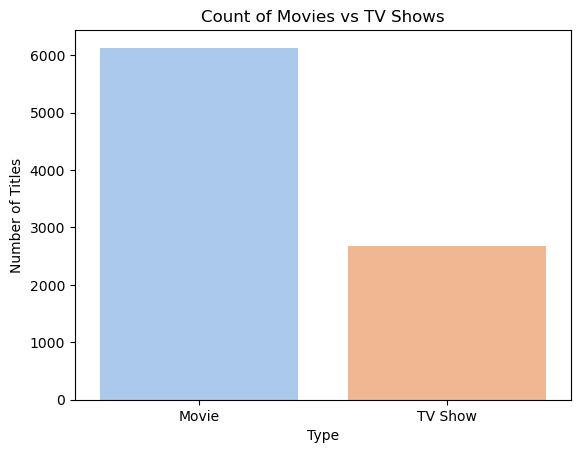

In [5]:
# Plot 

sns.barplot(data=df, x='type', y='count', palette='pastel')
plt.title('Count of Movies vs TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('Type')
plt.show()

## 📺 Distribution of Ratings

In [6]:
print("🔢 What kinds of ratings does Netflix content have? From TV-MA to PG, let's see how content is distributed across age categories.")

query = """
SELECT rating, COUNT(*) AS count
FROM netflix
GROUP BY rating
ORDER BY count DESC
"""

df = run_query(query)

🔢 What kinds of ratings does Netflix content have? From TV-MA to PG, let's see how content is distributed across age categories.


C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\3581749575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='count', y='rating', palette='muted')


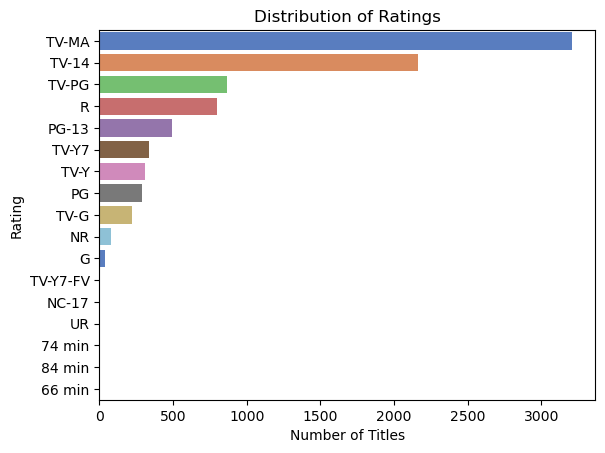

In [7]:
# Plot

sns.barplot(data=df, x='count', y='rating', palette='muted')
plt.title('Distribution of Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()


In [8]:
print("🧠 Which shows or movies have the longest descriptions? Let's find out which titles Netflix tried hardest to explain!")

query = """
SELECT title, LENGTH(description) AS desc_length
FROM netflix
ORDER BY desc_length DESC
LIMIT 5
"""

df = run_query(query)

🧠 Which shows or movies have the longest descriptions? Let's find out which titles Netflix tried hardest to explain!


C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\3630896375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='desc_length', y='title', palette='deep')


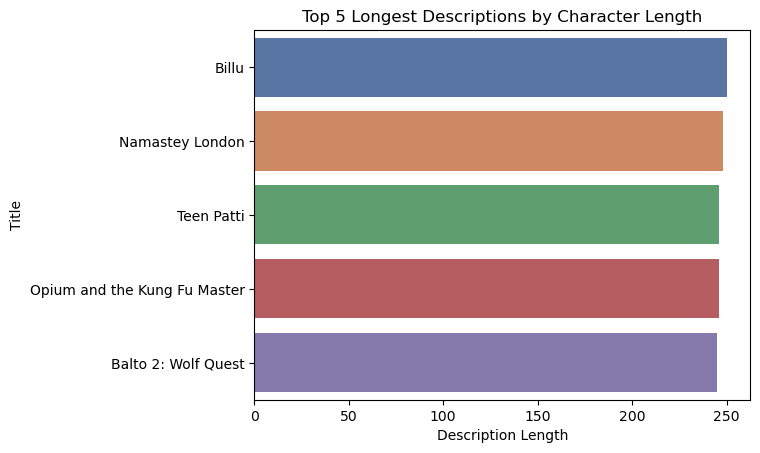

In [10]:
# Plot 
sns.barplot(data=df, x='desc_length', y='title', palette='deep')
plt.title('Top 5 Longest Descriptions by Character Length')
plt.xlabel('Description Length')
plt.ylabel('Title')
plt.show()


## 🥧 Top 5 Countries by Content — Pie Chart

In [11]:
query = """
SELECT country, COUNT(*) AS count FROM netflix
WHERE country IS NOT NULL
GROUP BY country ORDER BY count DESC LIMIT 5;
"""
df = run_query(query)


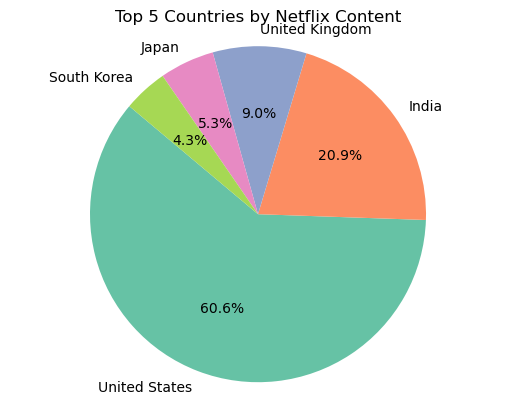

In [12]:
# Plot

plt.pie(data=df, x= 'count', labels= 'country', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Top 5 Countries by Netflix Content")
plt.axis('equal')
plt.show()

## 📈 Number of Releases Per Year — Line Plot

In [13]:
query = "SELECT release_year, COUNT(*) AS count FROM netflix GROUP BY release_year;"
df = run_query(query)

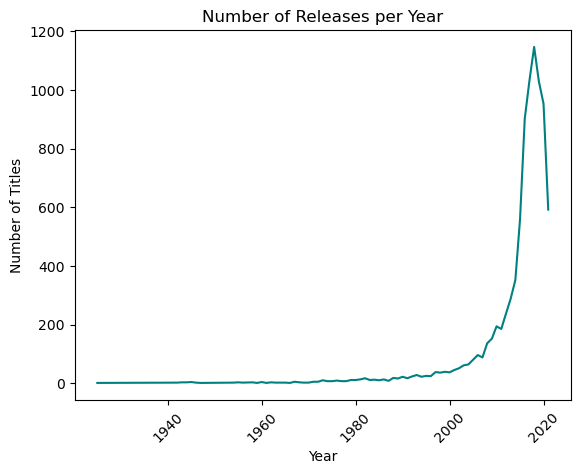

In [15]:
# Plot

sns.lineplot(data=df, x='release_year', y= 'count', markers='o', color = 'teal')
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

## 📊 Count by Rating — Bar Chart (Horizontal)

In [19]:
query = "SELECT rating, COUNT(*) AS count FROM netflix GROUP BY rating;"
df = run_query(query).sort_values(by='count', ascending=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\3224438425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'count', y='rating', palette='muted')


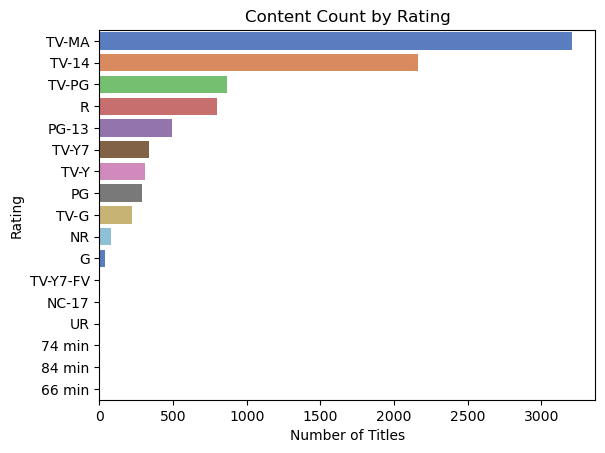

In [21]:
# Plot 

sns.barplot(data=df, x= 'count', y='rating', palette='muted')
plt.title("Content Count by Rating")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()

## 📅 Year When Titles Were Added — Bar Plot

In [22]:
query = """
SELECT EXTRACT(YEAR FROM STR_TO_DATE(date_added, '%M %d, %Y')) AS year_added,
       COUNT(*) AS count
FROM netflix
WHERE date_added IS NOT NULL
GROUP BY year_added
ORDER BY year_added;
"""
df = run_query(query)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\2586864611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'year_added', y= 'count', palette='coolwarm')


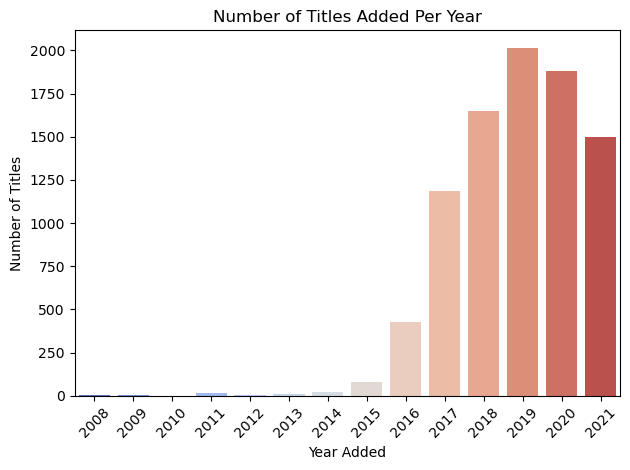

In [24]:
# Plot

sns.barplot(data=df, x= 'year_added', y= 'count', palette='coolwarm')
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🗓️ Titles Added Between 2019–2021 — Line Plot or Bar Plot

In [25]:
query = """
SELECT EXTRACT(YEAR FROM STR_TO_DATE(date_added, '%M %d, %Y')) AS year_added,
       COUNT(*) AS count
FROM netflix
WHERE date_added IS NOT NULL
AND EXTRACT(YEAR FROM STR_TO_DATE(date_added, '%M %d, %Y')) BETWEEN 2019 AND 2021
GROUP BY year_added
ORDER BY year_added;
"""
df = run_query(query)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\761809758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'year_added', y= 'count', palette='mako')


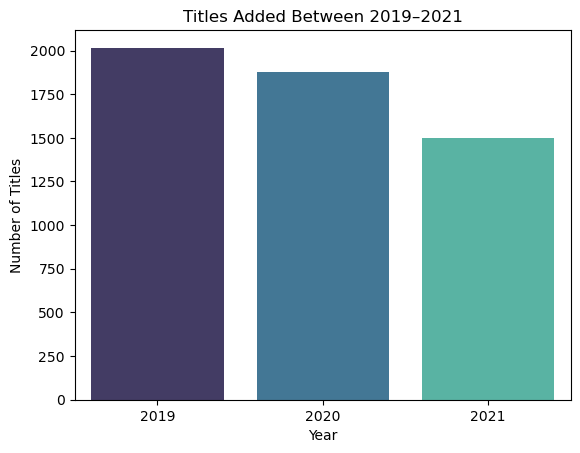

In [27]:
# Plot

sns.barplot(data=df, x= 'year_added', y= 'count', palette='mako')
plt.title("Titles Added Between 2019–2021")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

## 🎭 Top 5 Genres (listed_in) — Horizontal Bar Plot

In [28]:
query = """
SELECT listed_in, COUNT(*) AS count 
FROM netflix
GROUP BY listed_in 
ORDER BY count DESC LIMIT 5;
"""
df = run_query(query)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\3196665657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='listed_in', x='count', palette='light:#5A9')


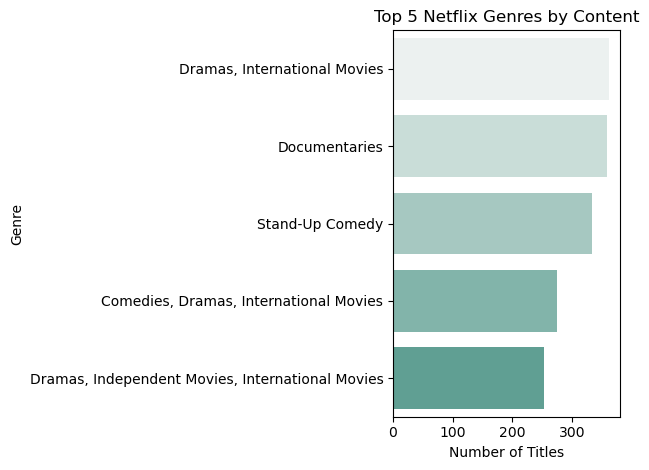

In [30]:
# Plot

sns.barplot(data=df, y='listed_in', x='count', palette='light:#5A9')
plt.title("Top 5 Netflix Genres by Content")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


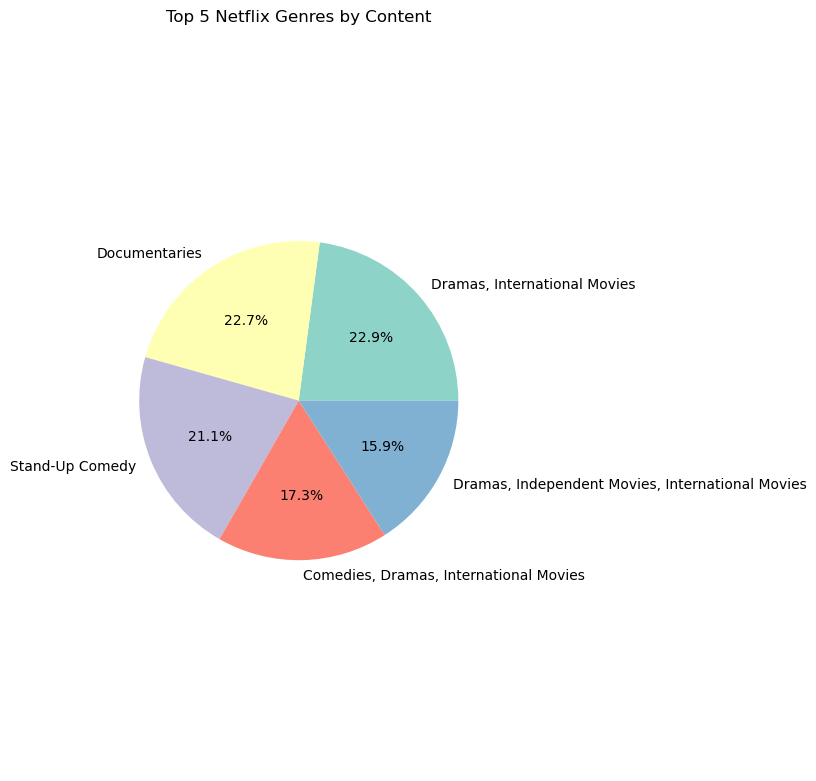

In [31]:
# Plot

plt.figure(figsize=(8, 8))
plt.pie(data=df, x='count', labels='listed_in', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title("Top 5 Netflix Genres by Content")
plt.axis('equal')  # Keeps pie chart circular
plt.tight_layout()
plt.show()

## 🎬 Top 5 Longest Movies by Duration — Bar Plot

In [32]:
query = """
SELECT title, CAST(SUBSTRING_INDEX(duration, ' ', 1) AS UNSIGNED) AS minutes
FROM netflix
WHERE type = 'Movie'
ORDER BY minutes DESC
LIMIT 5;
"""
df = run_query(query)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\470935175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'minutes', y= 'title',  palette='flare')


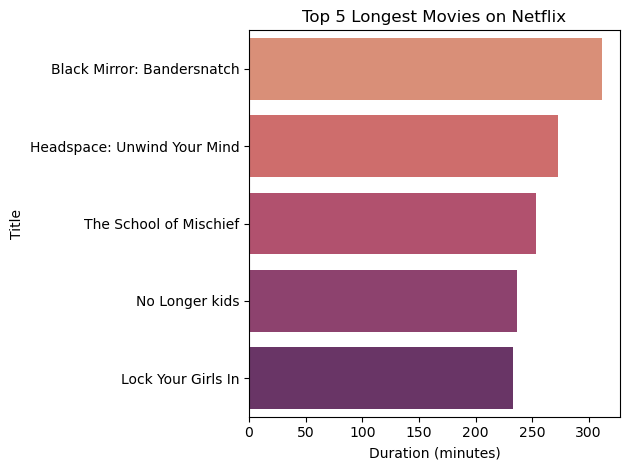

In [34]:
# Plot

sns.barplot(data=df, x= 'minutes', y= 'title',  palette='flare')
plt.title("Top 5 Longest Movies on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Title")
plt.tight_layout()
plt.show()

## 🎥 Top 10 Directors by Number of Contents — Pie Chart

In [35]:
query = """
SELECT director, COUNT(*) AS count 
FROM netflix 
WHERE director IS NOT NULL 
GROUP BY director 
ORDER BY count DESC 
LIMIT 10;
"""
df = run_query(query)

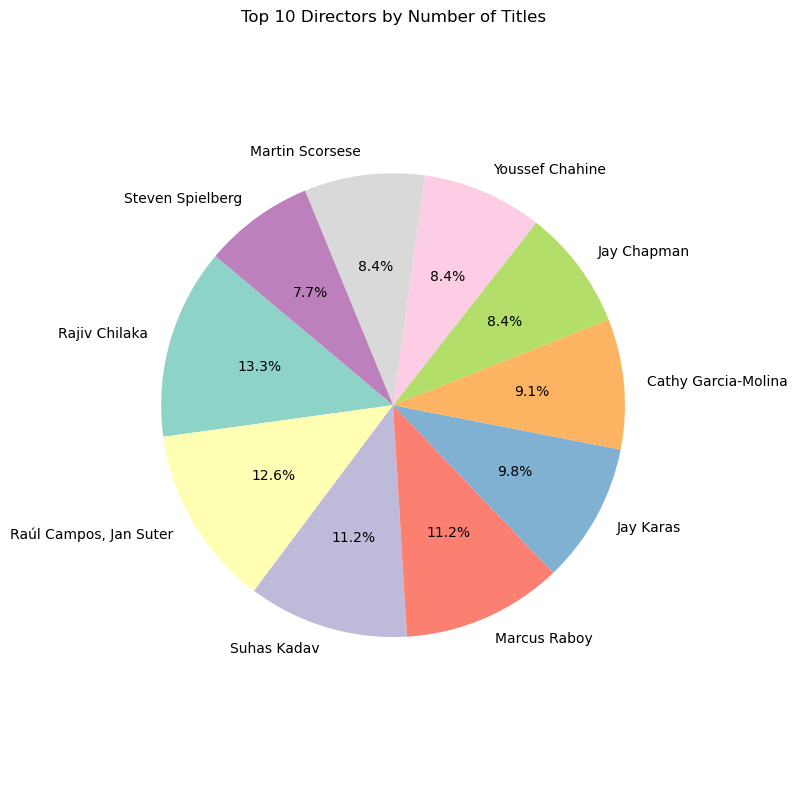

In [37]:
# Plot 

plt.figure(figsize=(8,8))
plt.pie(data=df, x='count', labels= 'director', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Top 10 Directors by Number of Titles")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## 📊 Monthly Content Additions — Line Plot

In [38]:
query = """
SELECT DATE_FORMAT(STR_TO_DATE(date_added, '%M %d, %Y'), '%Y-%m') AS month_added,
       COUNT(*) AS total
FROM netflix
WHERE date_added IS NOT NULL
GROUP BY month_added
ORDER BY month_added;
"""
df = run_query(query)


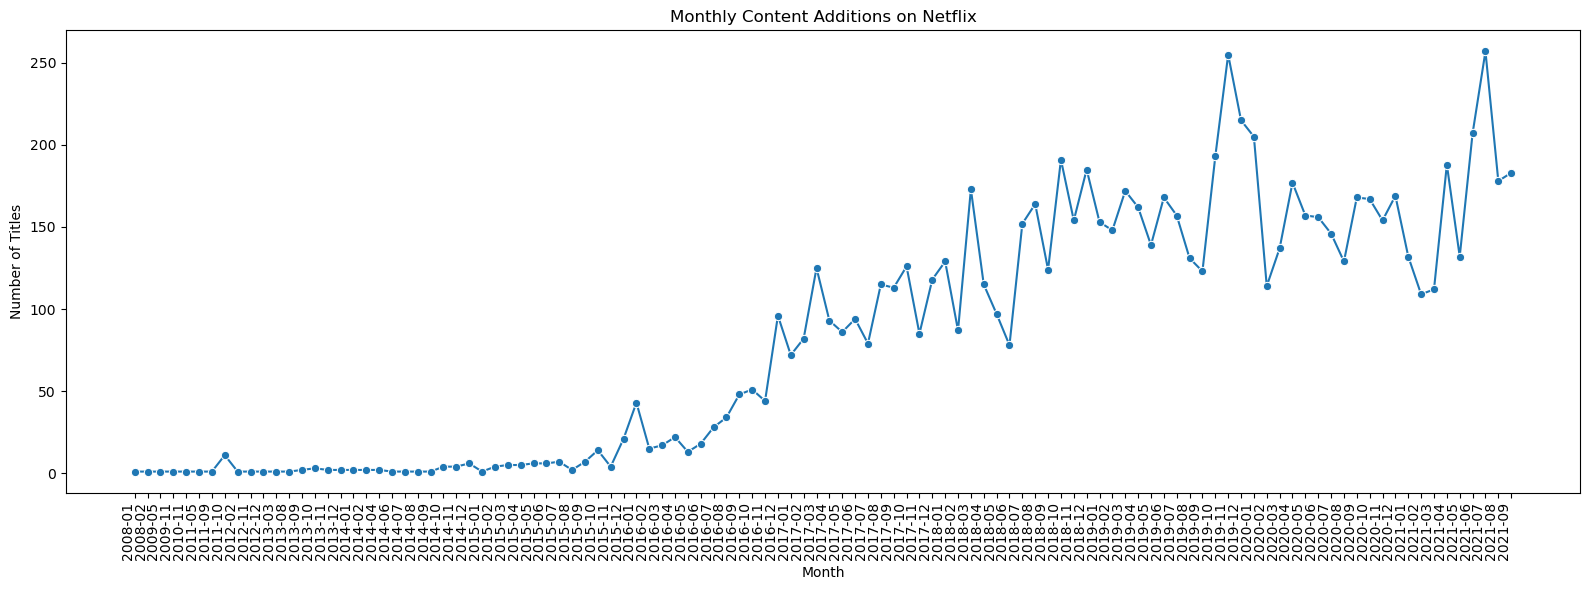

In [40]:
# Plot

plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='month_added', y='total', marker='o')
plt.xticks(rotation=90, ha='right')
plt.title("Monthly Content Additions on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


## Categorize Content by Rating Level (Pie Chart)

In [41]:
query = """
SELECT 
  CASE
    WHEN rating IN ('G', 'PG', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV') THEN 'Family'
    WHEN rating IN ('PG-13', 'TV-14', 'TV-PG') THEN 'Teen'
    WHEN rating IN ('R', 'TV-MA', 'NC-17') THEN 'Adult'
    ELSE 'Other'
  END AS category,
  COUNT(*) AS count
FROM netflix
WHERE rating NOT LIKE '%min%' AND rating IS NOT NULL
GROUP BY category;
"""
df = run_query(query)



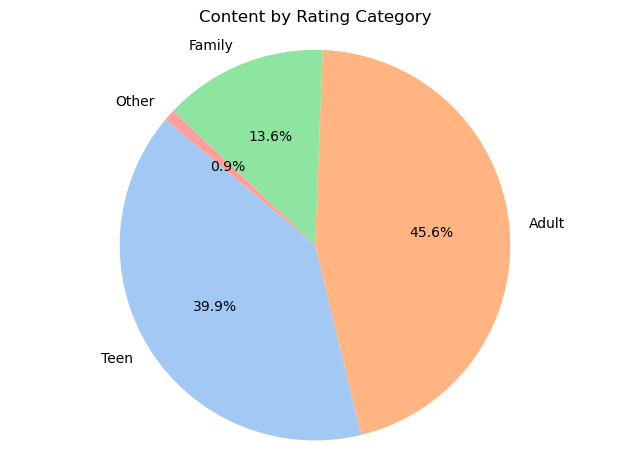

In [42]:
# Plot

plt.pie(data=df, x= 'count', labels= 'category', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Content by Rating Category")
plt.axis('equal')
plt.tight_layout()
plt.show()

## ✅ Top 5 Directors (Bar Plot)

In [43]:
query = """
SELECT director, COUNT(*) AS total FROM netflix 
WHERE director IS NOT NULL 
GROUP BY director 
ORDER BY total DESC LIMIT 5;
"""
df = run_query(query)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\2018025961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x= 'total', y= 'director', palette='Blues_d')


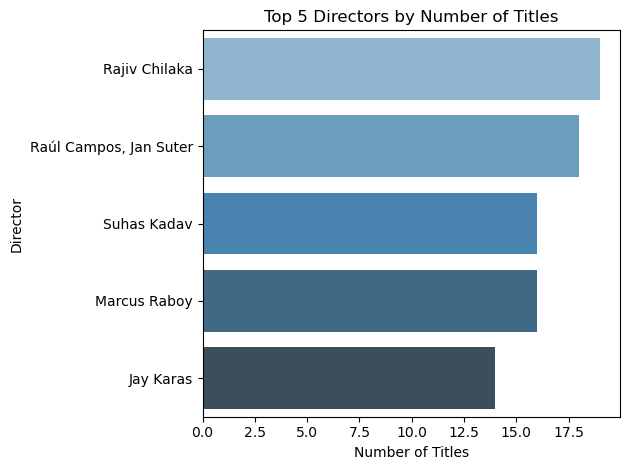

In [44]:
# Plot

sns.barplot(data=df, x= 'total', y= 'director', palette='Blues_d')
plt.title("Top 5 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

## ✅ Countries with > 100 Titles (Bar Plot)

In [45]:
query = """
SELECT country, COUNT(*) AS count 
FROM netflix 
WHERE country IS NOT NULL 
GROUP BY country 
HAVING COUNT(*) > 100 
ORDER BY count DESC;
"""
df = run_query(query)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\3338876209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x= 'count', y= 'country', palette='Greens_d')


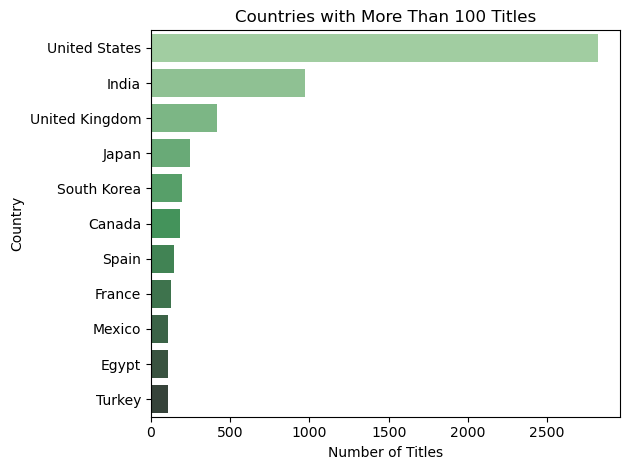

In [46]:
# Plot

sns.barplot(data=df,x= 'count', y= 'country', palette='Greens_d')
plt.title("Countries with More Than 100 Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## 🎨 Top 3 Recent Titles by Type

In [65]:
query = """
SELECT 
    title, 
    type, 
    date_added, 
    rnk
FROM (
    SELECT *, 
           RANK() OVER (PARTITION BY type ORDER BY STR_TO_DATE(date_added, '%M %d, %Y') DESC) AS rnk
    FROM netflix
    WHERE date_added IS NOT NULL
) AS ranked
WHERE rnk <= 3;
"""
df = run_query(query)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\2547874591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set1')


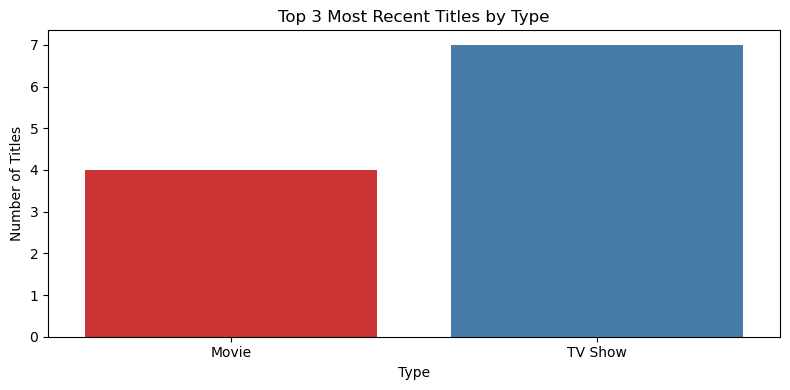

In [66]:
# Plot

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', palette='Set1')
plt.title('Top 3 Most Recent Titles by Type')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

## 🎨 Count of Single-Genre Titles by Genre

In [47]:
query = """
SELECT * 
FROM netflix 
WHERE listed_in NOT LIKE '%,%';
"""
df = run_query(query)


In [53]:
# Count single genres
genre_counts = df['listed_in'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\2328815651.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts.head(10), x='count', y='genre', palette='cubehelix')


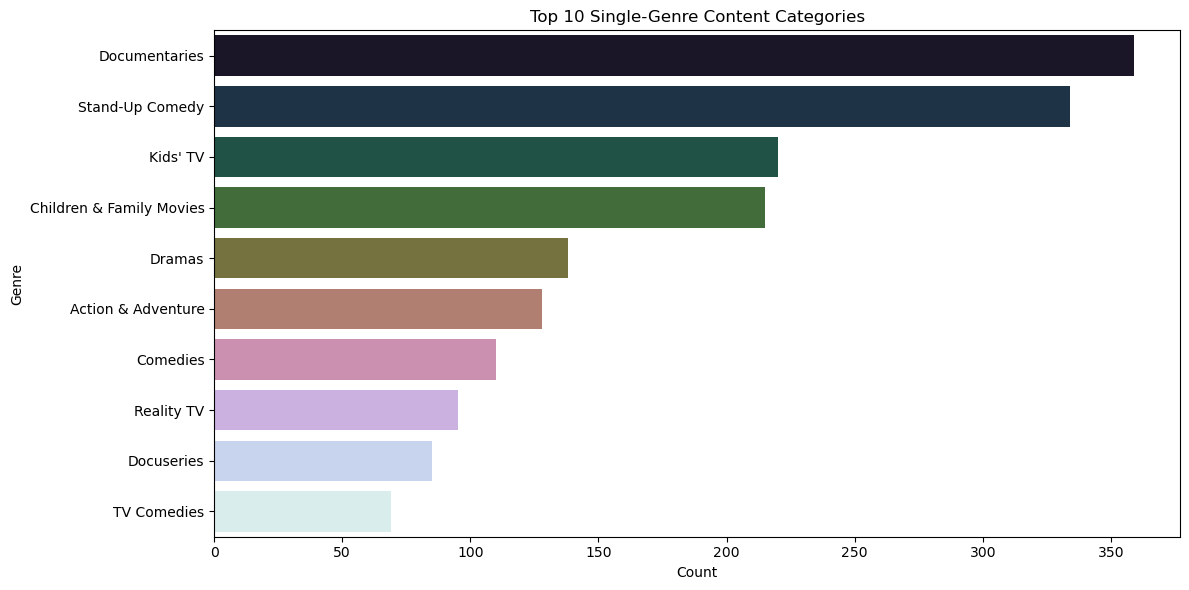

In [55]:
# Plot top 10 single genres

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts.head(10), x='count', y='genre', palette='cubehelix')
plt.title('Top 10 Single-Genre Content Categories')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## 🎨 First Release Year by Type

In [62]:
query = """
SELECT 
    type, 
    title, 
    release_year 
FROM (
    SELECT *, 
           RANK() OVER(PARTITION BY type ORDER BY release_year ASC) AS rnk 
    FROM netflix
    WHERE release_year IS NOT NULL
) AS ranked 
WHERE rnk = 1;
"""
df = run_query(query)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\2049189781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='type', y='release_year', palette='coolwarm')


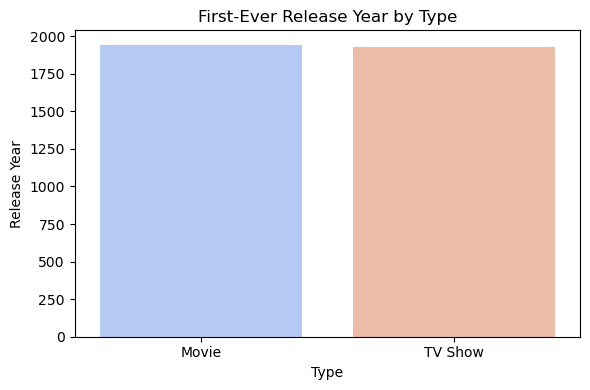

In [63]:
# Plot

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='type', y='release_year', palette='coolwarm')
plt.title('First-Ever Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.tight_layout()
plt.show()

## 🎨 Drama Titles Count by Type

In [60]:
query = """
WITH drama_titles AS (
    SELECT * 
    FROM netflix 
    WHERE listed_in LIKE '%Drama%'
)
SELECT * 
FROM drama_titles;
"""
df = run_query(query)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\4002187822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= 'type', palette='muted')


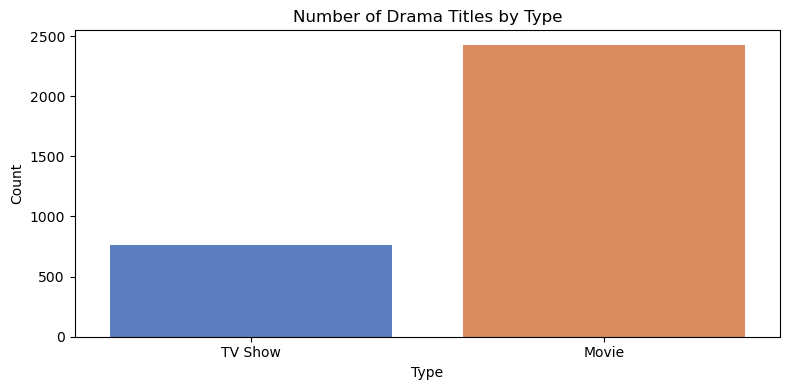

In [ ]:
# Plot

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x= 'type', palette='muted')
plt.title('Number of Drama Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 🎨 Top Countries by Frequency in Top 3 Recent Titles

In [68]:
query = """
SELECT 
    title, 
    TRIM(BOTH ',' FROM TRIM(country)) AS country, 
    rnk 
FROM (
    SELECT *, 
           ROW_NUMBER() OVER(PARTITION BY country ORDER BY STR_TO_DATE(date_added, '%M %d, %Y') DESC) AS rnk 
    FROM netflix
    WHERE country IS NOT NULL
) AS ranked 
WHERE rnk <= 3;
"""
df = run_query(query)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\3839217602.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='count', y='country', palette='viridis')


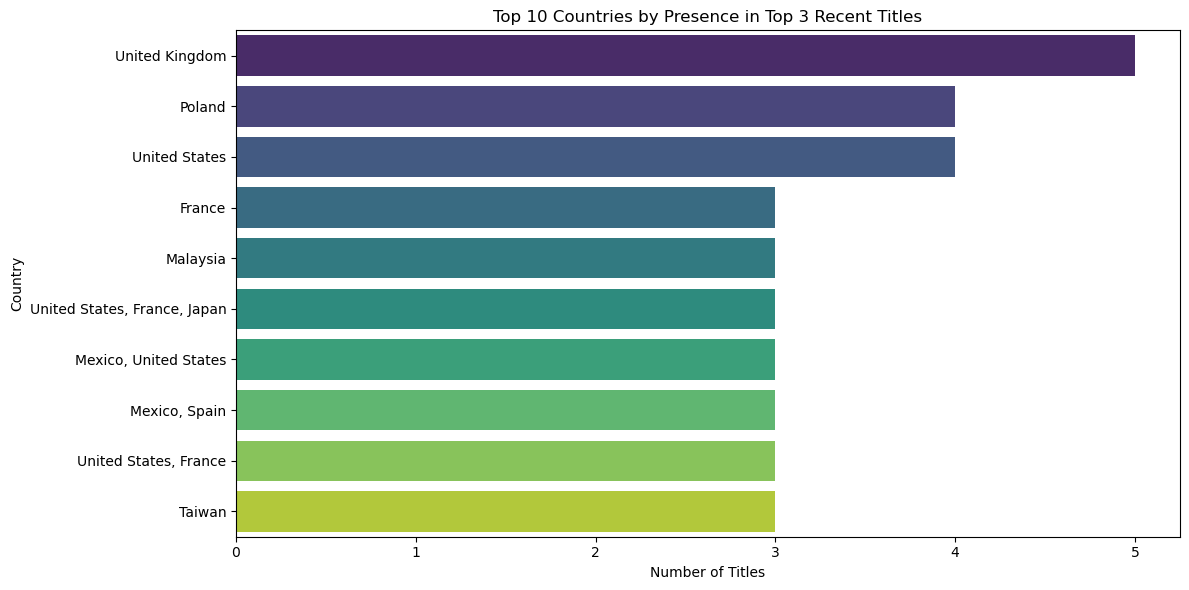

In [69]:
# Group by country and count number of titles (since each country can have up to 3)
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Filter top 10 countries
top_countries = country_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='count', y='country', palette='viridis')
plt.title('Top 10 Countries by Presence in Top 3 Recent Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## ✅ Directors with more than 5 titles

In [72]:
query = """
SELECT 
    director, COUNT(*) AS total_count
FROM
    netflix
WHERE
    director IS NOT NULL
GROUP BY 
    director
HAVING 
    COUNT(*) > 5
ORDER BY 
    total_count DESC;
"""
df = run_query(query)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5580\1253200552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='total_count', y='director', palette='mako')


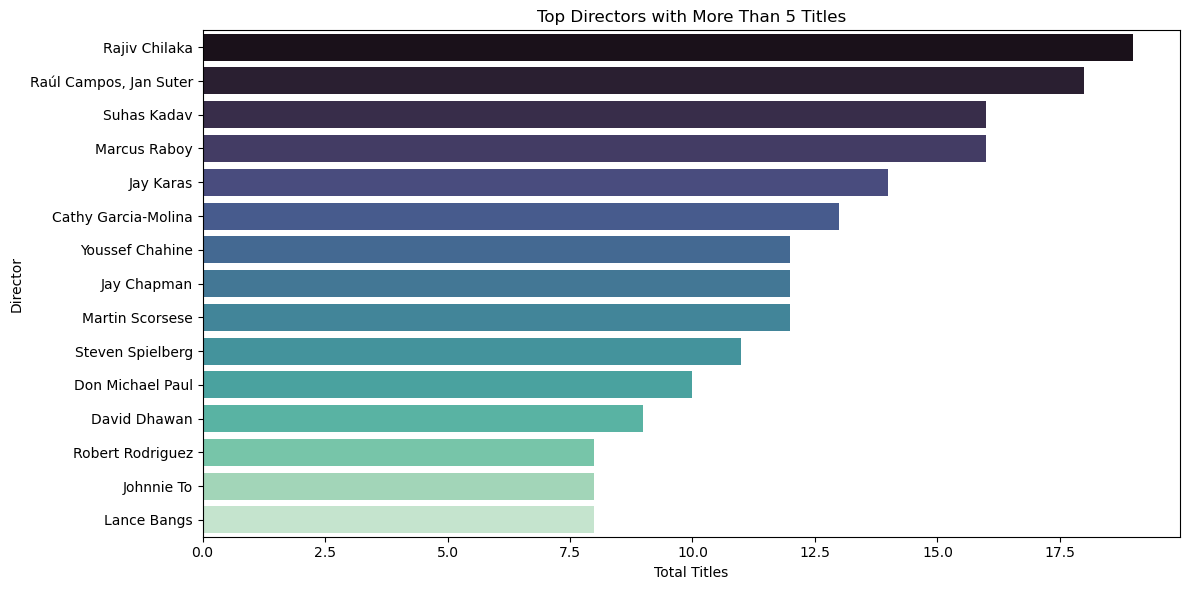

In [73]:
top_directors = df.sort_values('total_count', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='total_count', y='director', palette='mako')
plt.title('Top Directors with More Than 5 Titles')
plt.xlabel('Total Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

## ✅ Number of releases by type per year

In [76]:
query = """
SELECT 
    release_year, type, COUNT(*) AS count 
FROM 
    netflix 
GROUP BY 
    type, release_year 
ORDER BY 
    release_year;
"""
df = run_query(query)

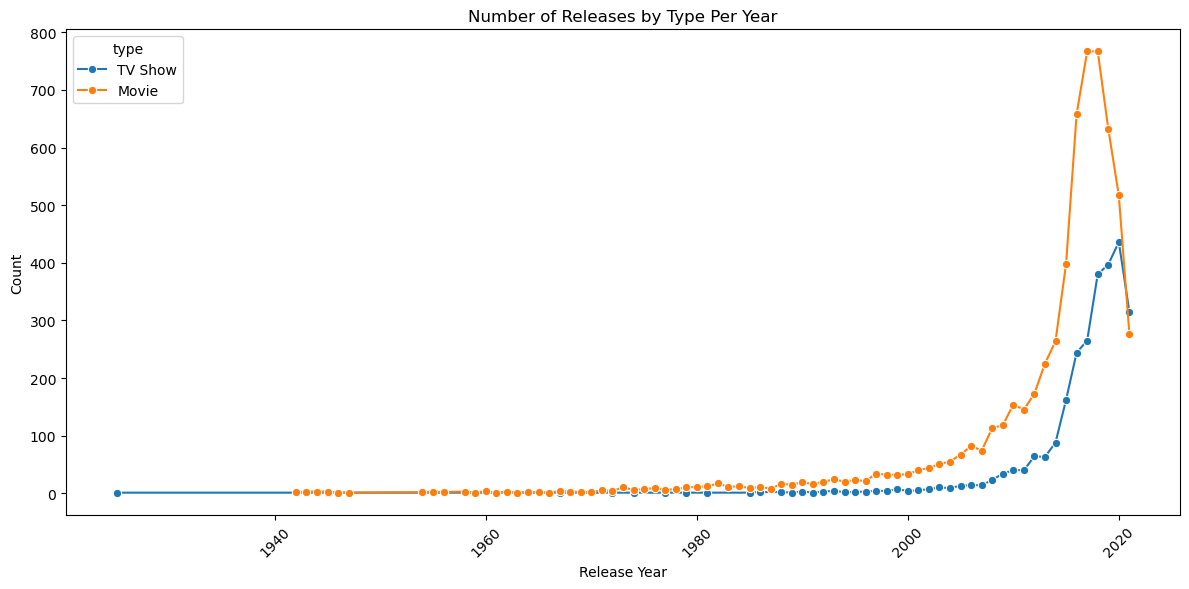

In [77]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_year', y='count', hue='type', marker='o', palette='tab10')
plt.title('Number of Releases by Type Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ✅ Movies longer than 2 hours

In [78]:
query = """
SELECT 
    title, duration
FROM
    netflix
WHERE
    type = 'Movie' AND duration LIKE '%min%'
        AND CAST(SUBSTRING_INDEX(duration, ' ', 1) AS UNSIGNED) > 120;
"""
df = run_query(query)

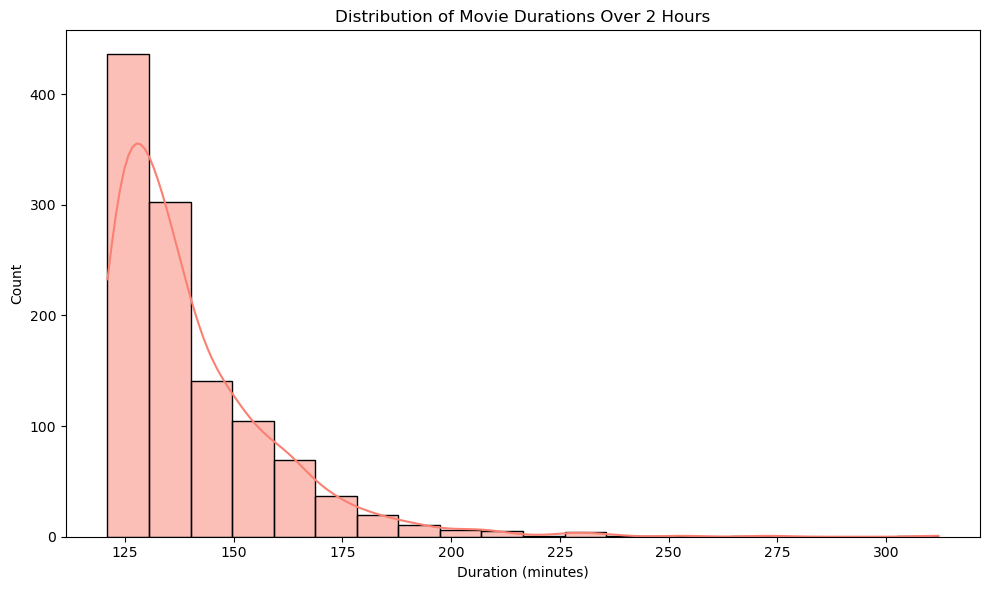

In [79]:
# Use split instead of extract
df['duration_min'] = df['duration'].str.split(' ').str[0].astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(df['duration_min'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Movie Durations Over 2 Hours')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## ✅ Content additions per year grouped by type

In [74]:
query = """
SELECT 
    EXTRACT(YEAR FROM STR_TO_DATE(date_added, '%M %d, %Y')) AS year_added,
    type,
    COUNT(*) AS total_count
FROM
    netflix
WHERE
    date_added IS NOT NULL
GROUP BY 
    year_added , type
ORDER BY 
    year_added;
"""
df = run_query(query)

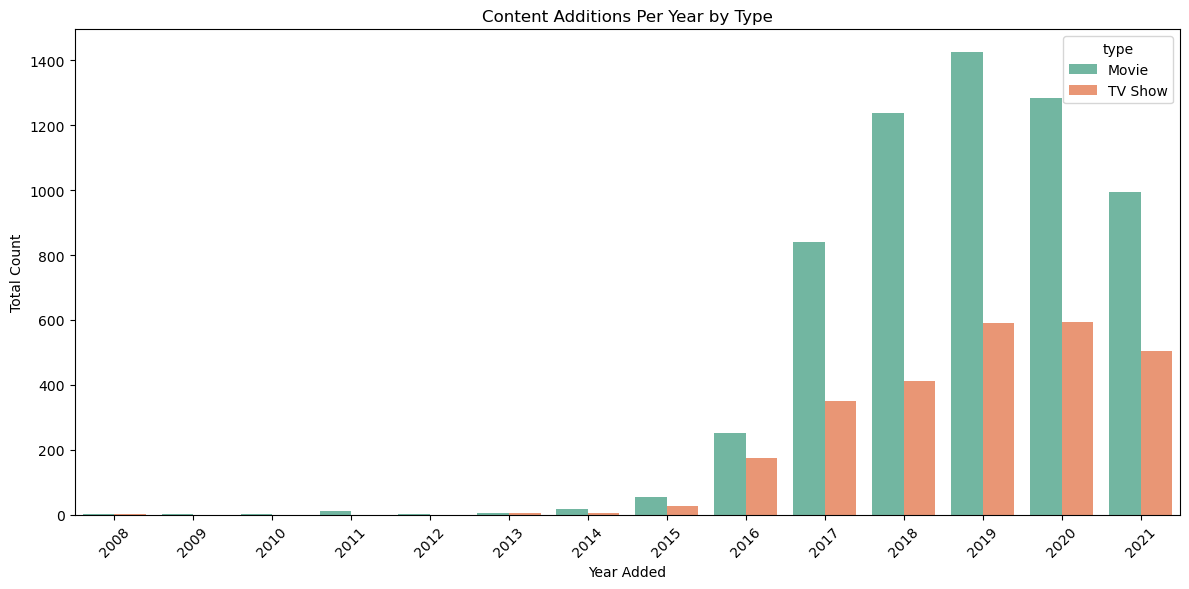

In [75]:
# Plot

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='year_added', y='total_count', hue='type', palette='Set2')
plt.title('Content Additions Per Year by Type')
plt.xlabel('Year Added')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()